In [233]:
import requests
import json
import time
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

from VK_API.credentials import TOKEN, USER_ID

*Получаем friends data через friends.get с полями=sex,city,country,bdate,education,universities*

In [554]:
friends_data = requests.get(f'https://api.vk.com/method/friends.get?user_id={USER_ID}&v=5.122&access_token={TOKEN}&fields=sex,city,country,bdate,education,universities,occupation,schools,career').json()
# friends_data

**friends.getMutual**
*Возвращает список идентификаторов общих друзей между парой пользователей.*

In [235]:
# выделяем id пользователей из friends_data и храним в list
friends_ids = list(map( lambda a: a['id'], friends_data['response']['items']))
# создаём словарь mutual_friends_list
mutual_friends_list = {}
mutual_friends_url = 'https://api.vk.com/method/friends.getMutual?source_uid={}&v=5.52&access_token={}&target_uid={}'

# print(len(friends_ids)) = 222

for friend_id in friends_ids:
        mutual_friends_get = requests.get(mutual_friends_url.format(USER_ID, TOKEN, friend_id)).json()                               
        if mutual_friends_get.get('error'):                              
            time.sleep(3) #ограничение запросов
            mutual_friends_get = requests.get(mutual_friends_url.format(USER_ID, TOKEN, friend_id)).json()
#             print(mutual_friends_get)                                     
        if not mutual_friends_get.get('error'):
             mutual_friends_list[friend_id] =  mutual_friends_get['response']
# print(len(mutual_friends_list.keys()))                                             

In [555]:
# mutual_friends_list.items()

**Графы друзей**

In [292]:
# Строим граф друзей ( учитывая общих друзей)
def make_graph_all_friends(mutual_friends_list):
    graph = nx.Graph()
#     labels = {}
#     node = 0
    mutual = mutual_friends_list.items()
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
#             labels[node] = get_friend_data_by_id(friend).get('last_name')
#             print(labels)
#             node += 1
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item)
    return graph

In [293]:
graph= make_graph_all_friends(mutual_friends_list)

In [485]:
# Стандартная функция для отрисовки графа
def plot_graph(graph, index):
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(graph)
#     if isLabels:
#     nx.draw_networkx_labels(graph, labels, font_size=6)
    nx.draw(graph, node_color = None, node_size=20)
    plt.savefig(f'VK_API/graph_data/graph{index}.png')

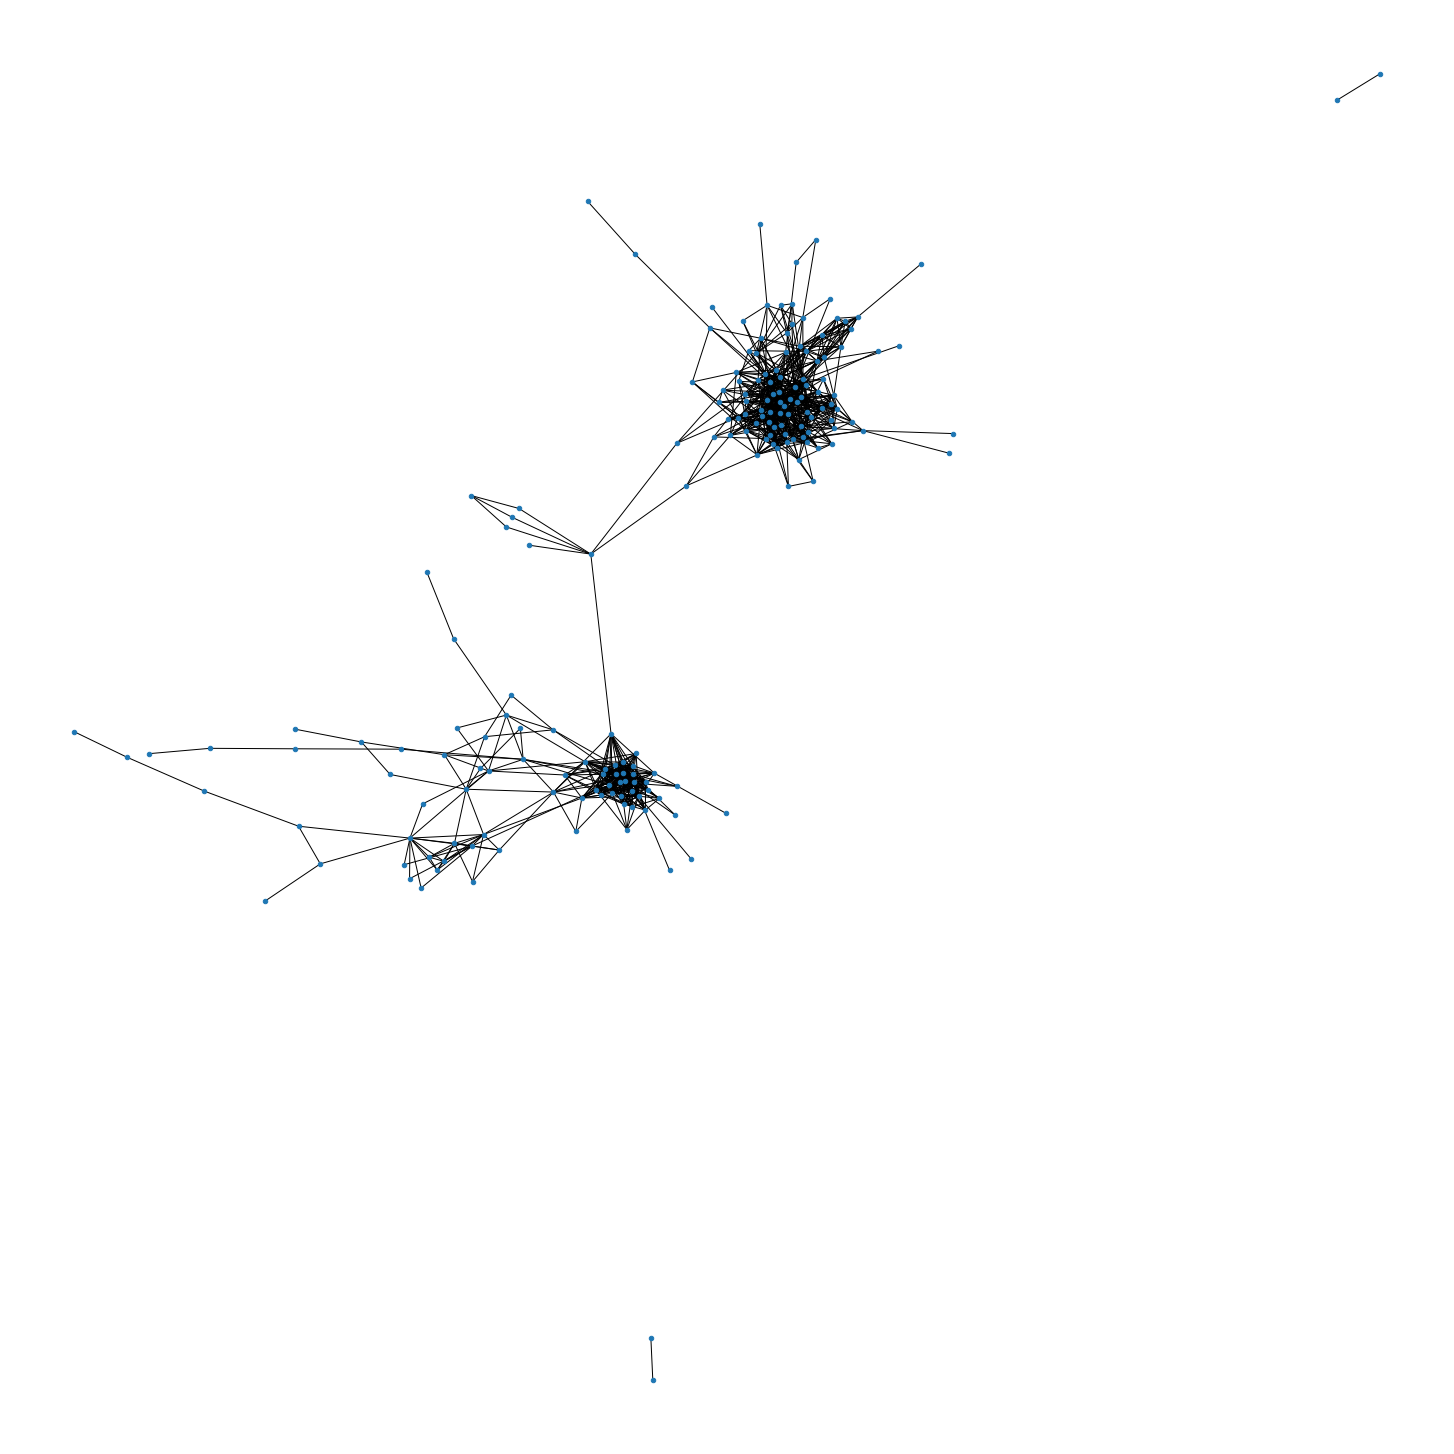

In [481]:
index = 0
plot_graph(graph, index)
index += 1

In [298]:
# Строим граф друзей ( учитывая общих друзей) с заданным параметром необходимого количества общих друзей (не меньше 2х, например)
def make_graph_less_friends(mutual_friends_list, amount_of_mutual):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    for friend in mutual_friends_list.keys():
        if len(mutual_friends_list[friend])> amount_of_mutual:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item)
    return graph

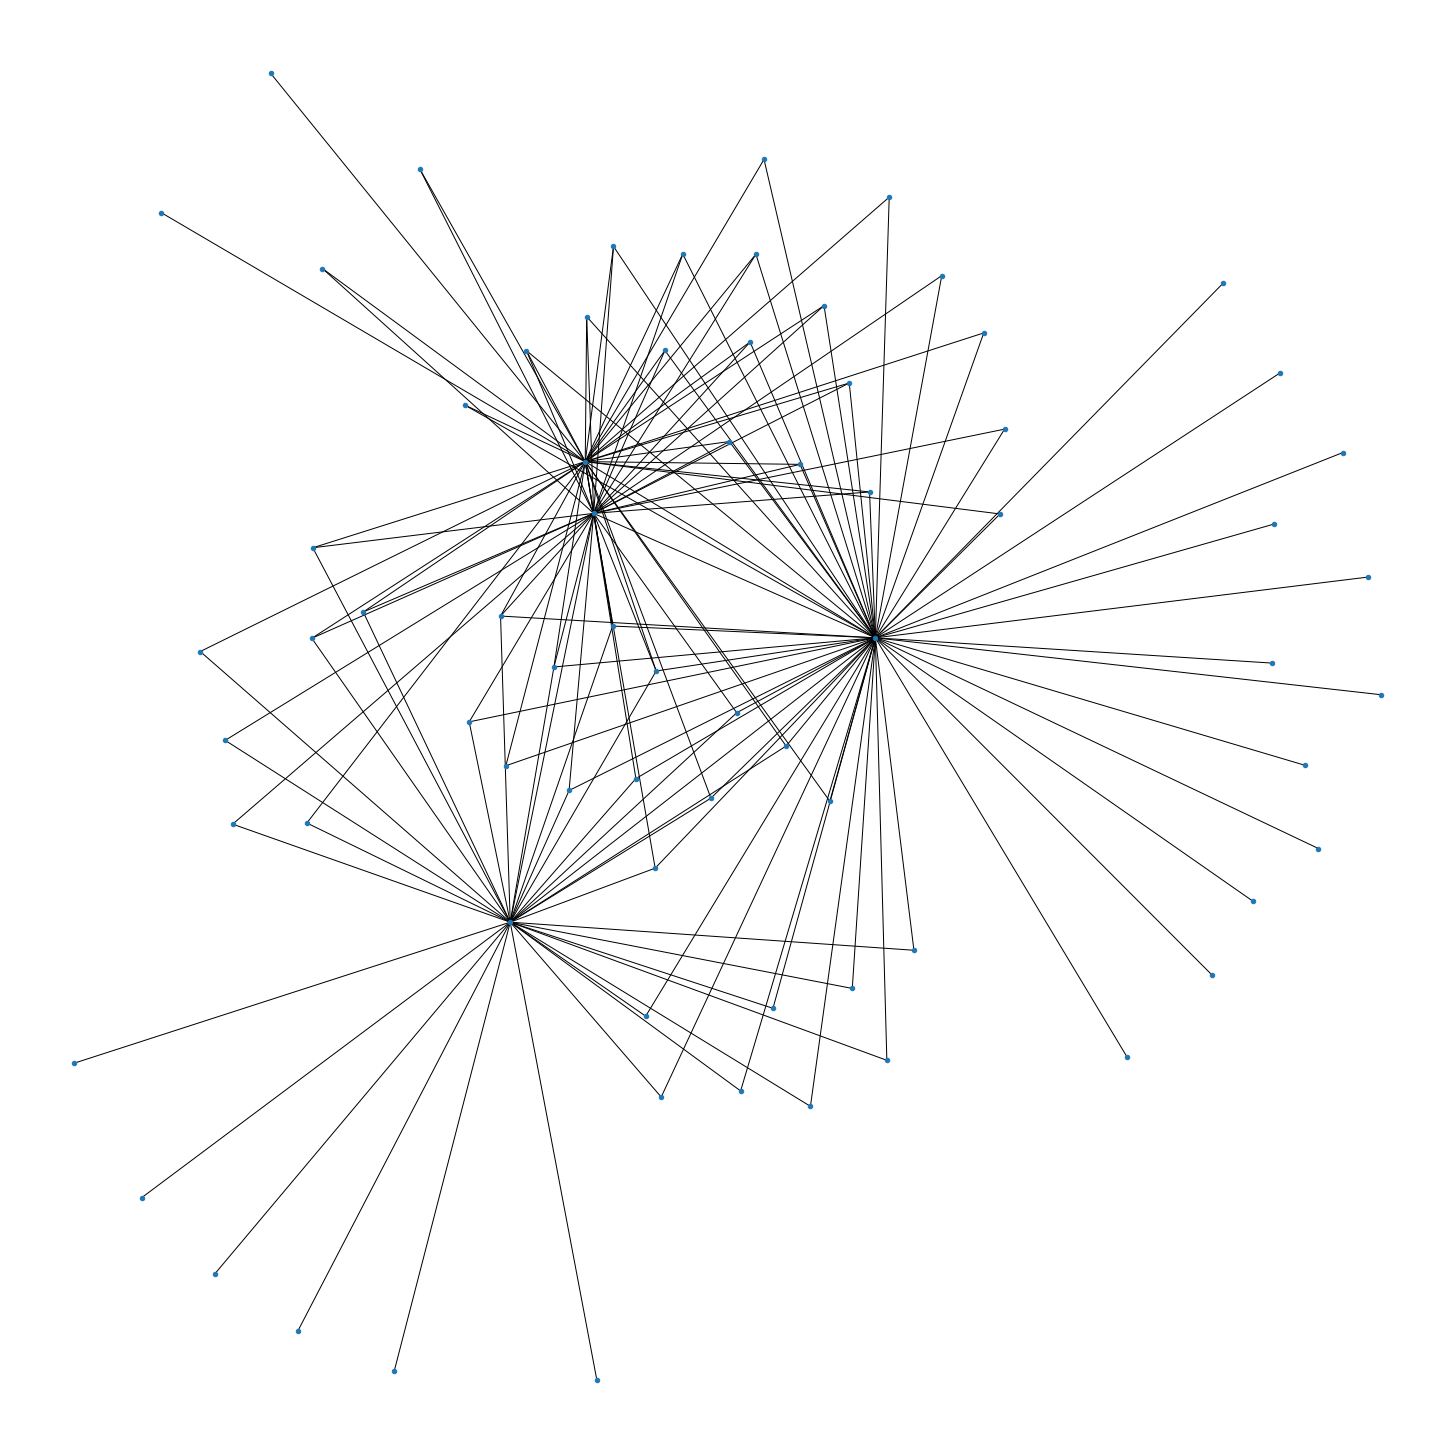

In [299]:
graph2 = make_graph_less_friends(mutual_friends_list, 30)
plot_graph(graph2,index)
index +=1

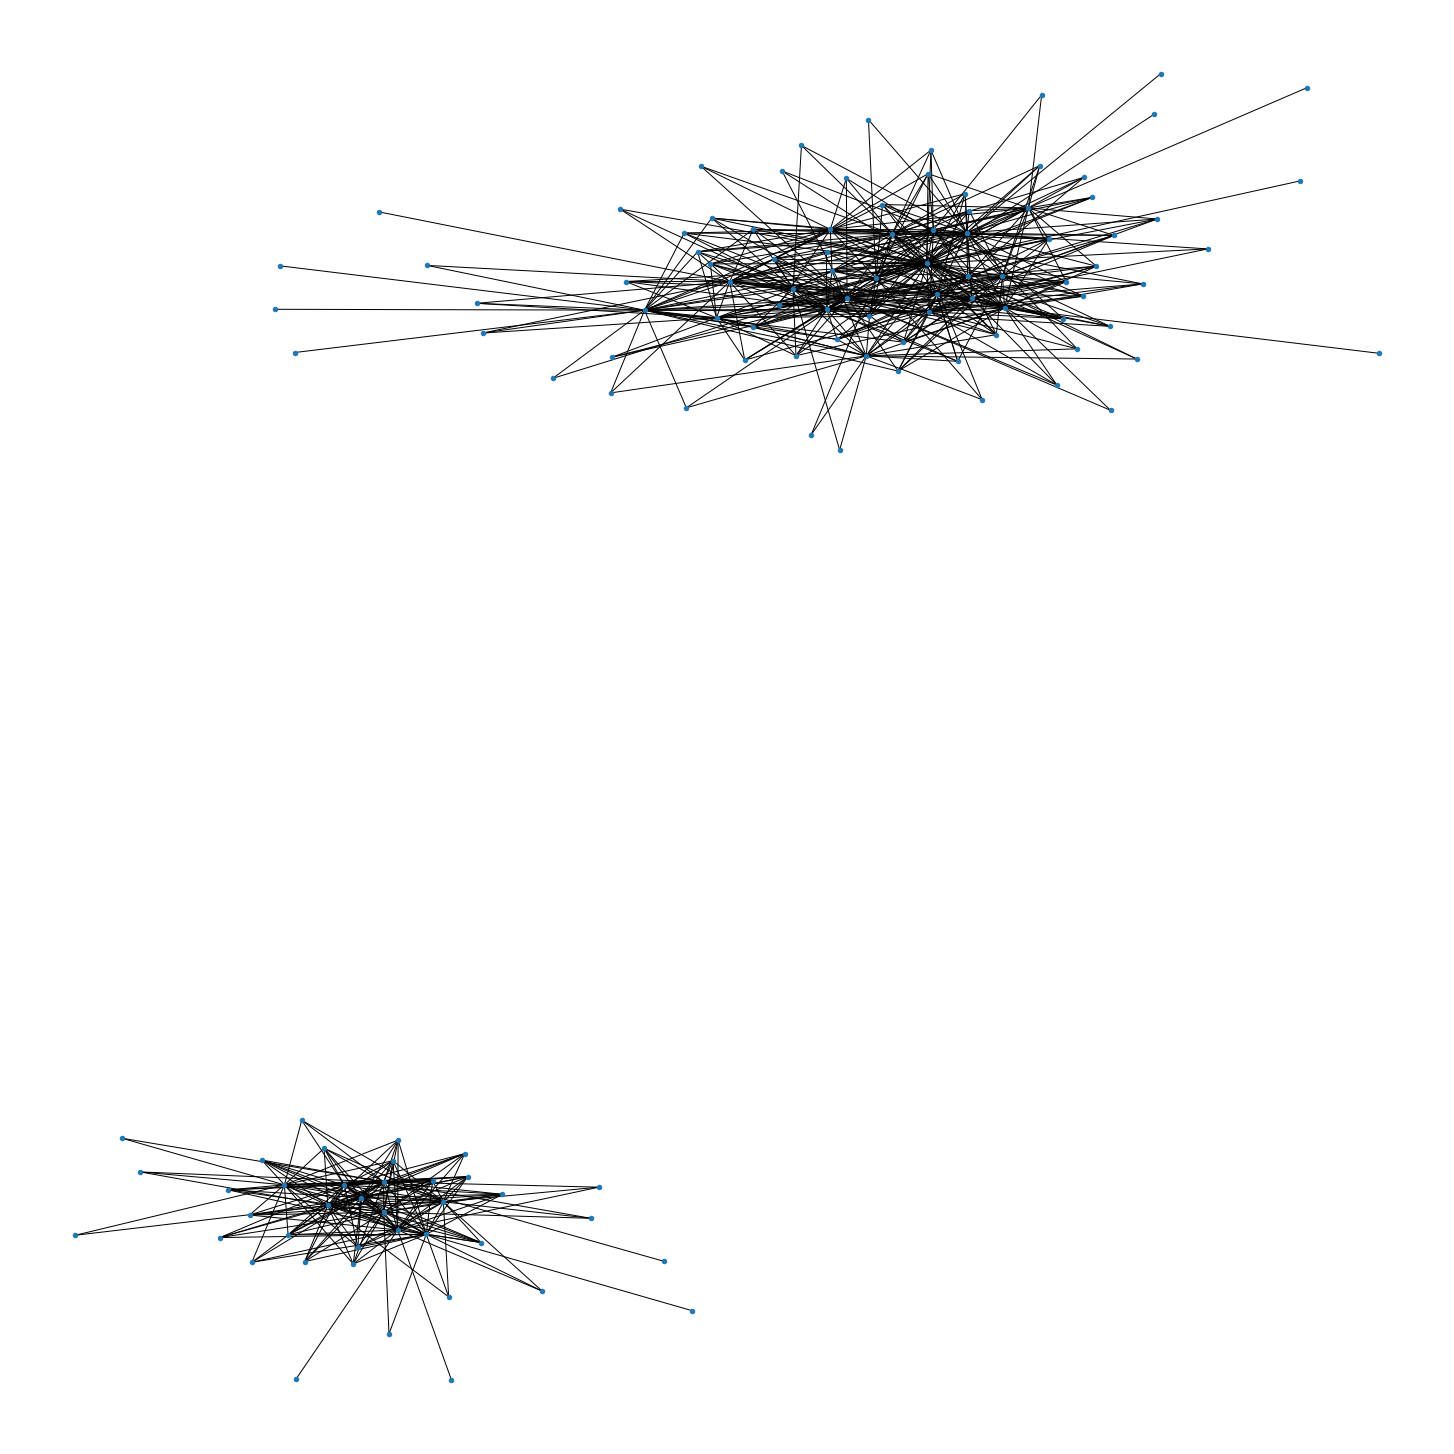

In [301]:
graph3 = make_graph_less_friends(mutual_friends_list, 20)
plot_graph(graph3,index)
index +=1

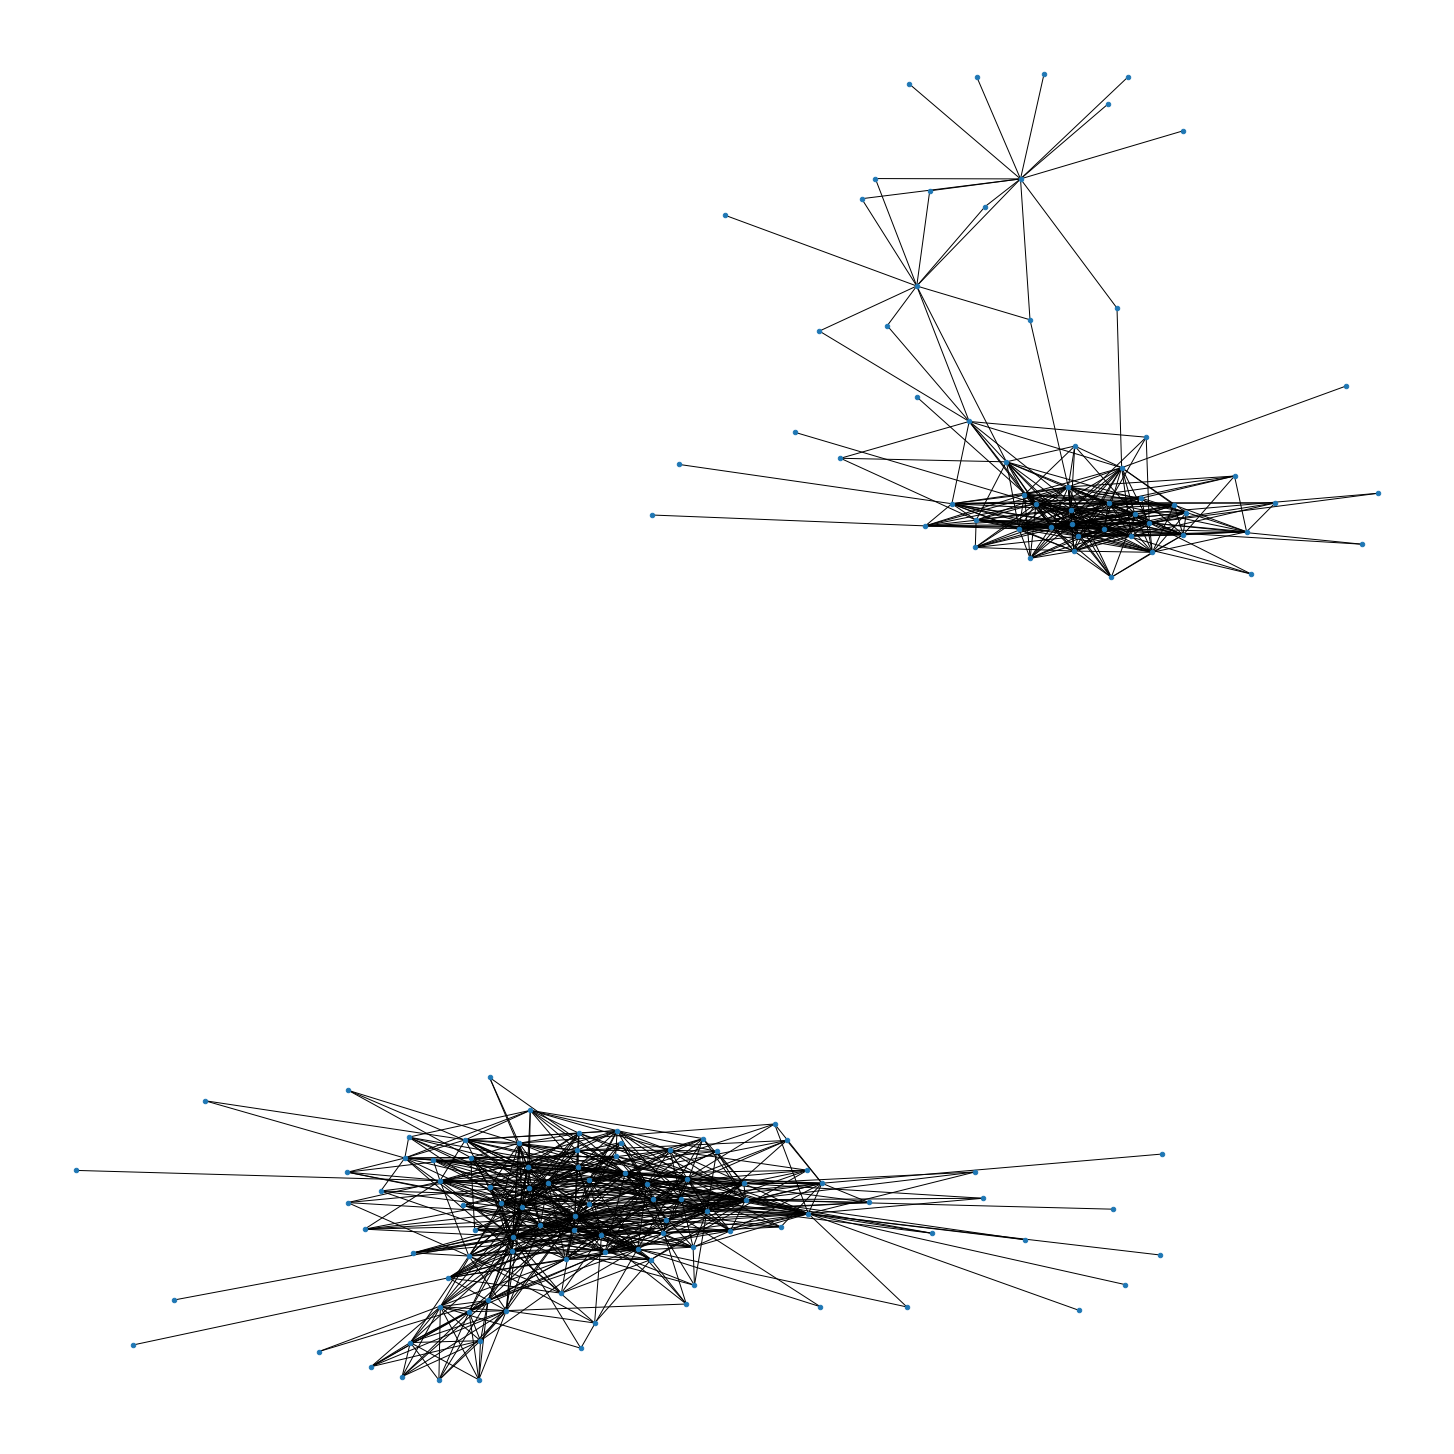

In [302]:
graph4 = make_graph_less_friends(mutual_friends_list, 10)
plot_graph(graph4,index)
index +=1

**Графы с учётом дополнительных параметров**

In [466]:
# Получить данные эмплоя по id
def get_friend_data_by_id(id):
    temp=friends_data['response']['items']
    for item in range(0,len(temp)):
        if temp[item].get('id')==id:
            data = temp[item]
            return data
    return "Error: id is invalid"

**Исследуем базовые соотношения в данных по параметрам**

['' 'Ludwig-Maximilians-Universität München' 'Ruhr-Universität Bochum'
 'ВГУЭС (бывш. ДВТИ)' 'ГУАП' 'Горный университет (бывш. СПГГУ)' 'МГУ'
 'НГУ им. П. Ф. Лесгафта (бывш. СПбГУФК)' 'НИУ ВШЭ (СПб)'
 'РГИСИ (бывш. СПбГАТИ)' 'РГПУ им. А. И. Герцена'
 'СЗ филиал РГУП (бывш. СЗ филиал РАП)'
 'СЗГМУ им. Мечникова (бывш. СПбГМА, СПбМАПО, ЛСГМИ) '
 'СЗИУ РАНХиГС (бывш. СЗАГС)' 'СПбГАСУ' 'СПбГИК (бывш. СПбГУКИ)'
 'СПбГПМУ (бывш. СПбГПМА, ЛПМИ)' 'СПбГУ' 'СПбГУ ГА'
 'СПбГУПТД (бывш. СПГУТД)' 'СПбГУТ им. Бонч-Бруевича' 'СПбГЭТУ (ЛЭТИ)'
 'СПбГЭУ' 'СПбПУ Петра Великого (Политех)'
 'СПбУТУиЭ (бывш. САУ, СПбУУЭ, СПбАУЭ)' 'СЮА' 'УдГУ' 'Университет ИТМО'
 'УрФУ им. первого Президента России Б. Н. Ельцина' 'Филиал МИЭП'
 'Царскосельский филиал СПбГАТИ' 'ЮУрГУ (НИУ)'] [96  1  1  1  1  2  1  1  1  1  1  1  1  3  4  1  1 74  1  3  1  3  1 13
  1  1  1  1  1  1  1  1]
['СПбГУ', '', 'СЗИУ РАНХиГС (бывш. СЗАГС)', '', 'СПбГУ', 'СПбГУ', 'СПбГУ', '', 'СПбГУ', '', '', 'СПбГЭТУ (ЛЭТИ)', 'СПбГУ', 'СПбГУ', 'СЮА', '

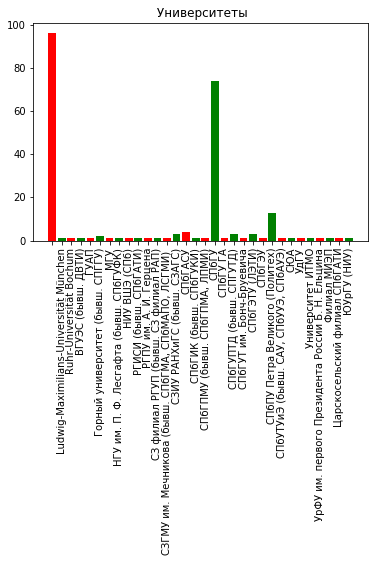

In [499]:
universities = list(map(lambda u: u['university_name'] if 'university' in u.keys() else '',friends_data['response']['items'] ))
labels, counts = np.unique(universities, return_counts=True)
print(labels, counts)
print(universities)
# plt.plot(labels,counts)
plt.xticks(rotation = 'vertical')
plt.bar(labels, counts,
        width = 0.8, color = ['red', 'green']) 
plt.title(" Университеты")
plt.show()

Выводы: У 96 друзей нет данных об университете, СПбГУ как и ожидалось в лидерах 74 человека, далее Политех 13 человек.

[1 2] [150  72]
[2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1]


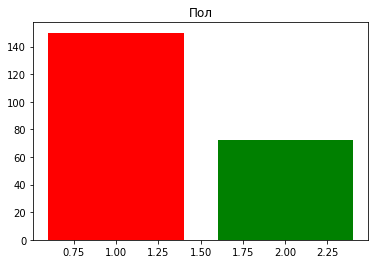

In [308]:
sex = list(map(lambda s: s['sex'],friends_data['response']['items'] ))
labels, counts = np.unique(sex, return_counts=True)
print(labels, counts)
print(sex)
# plt.plot(labels,counts)
plt.bar(labels, counts, color = ['red', 'green']) 
plt.title("Пол")
plt.show()

Выводы: 150 друзей -женщины, 72- мужчины, несбалансированно.

['' 'Viljandi Valuoja Põhikool'
 'Автотранспортный и электромеханический колледж (АТЭМК, бывш. ЛАТТ)'
 'Гимназия' 'Гимназия № 10' 'Гимназия № 117' 'Гимназия № 3'
 'Гимназия № 3 (бывш. Школа № 2)' 'Гимназия № 32' 'Гимназия № 35'
 'Гимназия № 406' 'Гимназия № 56' 'Гимназия №116'
 'Гимназия №148 им. Сервантеса' 'Гимназия №19' 'Гимназия №248'
 'Гимназия №271 им. П. И. Федулова' 'Гимназия №293' 'Гимназия №5'
 'Гимназия №61' 'Гимназия №622' 'Гимназия №63'
 'Гимназия №642 «Земля и Вселенная»' 'Гимназия №73' 'Гимназия №93'
 'Губернаторский многопрофильный лицей-интернат для одаренных детей Оренбуржья'
 'Детско-юношеская спортивная школа олимпийского резерва Невского района'
 'Лицей' 'Лицей ДВГТУ' 'Лицей № 1' 'Лицей № 1 им А. С. Пушкина'
 'Лицей № 101' 'Лицей № 22' 'Лицей № 27' 'Лицей № 35' 'Лицей № 40'
 'Лицей № 5' 'Лицей № 78 им. А. С. Пушкина' 'Лицей №1' 'Лицей №101'
 'Лицей №214' 'Лицей №32' 'Лицей №344' 'Лицей №369' 'Лицей №384'
 'Лицей №51' 'Ломоносовская гимназия №73' 'Математический лиц

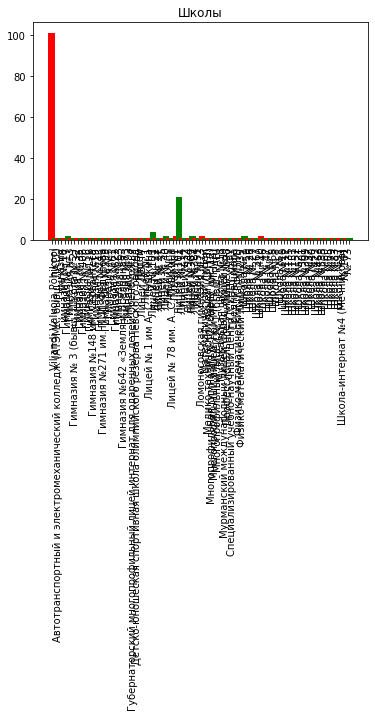

In [498]:
schools = list(map(lambda u: u['schools'][0]['name'] if 'schools' in u.keys() and u.get('schools') else '',friends_data['response']['items'] ))
labels, counts = np.unique(schools, return_counts=True)
print(labels, counts)
print(schools)
# plt.plot(labels,counts)
plt.xticks(rotation = 'vertical')
plt.bar(labels, counts,
        width = 2, color = ['red', 'green']) 
plt.title("Школы")
plt.show()

Выводы: У половины пользователей отсутствуют данные о школе, 21 имеют "Лицей №101" явная группа одноклассников.

['' 'Deutschlehrerin' 'Intern' 'Инженер-программист'
 'От черепахи к улитке перешла; от улитки перешла к червячку'
 'Разработчик' 'Светооператор' 'Член органа' 'басист'] [214   1   1   1   1   1   1   1   1]
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Deutschlehrerin', '', '', '', '', '', '', '', '', '', 'басист', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Разработчик', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Инженер-программист', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Светооператор', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'От черепахи к улитке перешла; от улитки перешла к червячку', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

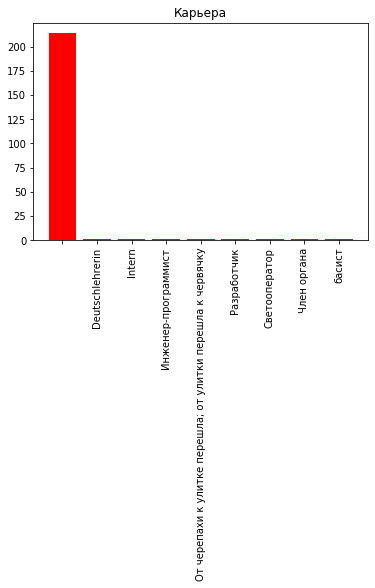

In [518]:
# career = list(map(lambda u: u['career'][0]['group_id'] if 'career' in u.keys() and u.get('career') else '',friends_data['response']['items'] ))
career = []
for u in friends_data['response']['items']:
    try: 
        if u.get('career'):
            career.append(u['career'][0]['position'])
        else: career.append("")
    except KeyError:
        career.append("")
labels, counts = np.unique(career, return_counts=True)
print(labels, counts)
print(career)
# plt.plot(labels,counts)
plt.xticks(rotation = 'vertical')
plt.bar(labels, counts,
        width = 0.8, color = ['red', 'green']) 
plt.title("Карьера")
plt.show()

['' 'BaltInfoCom' 'DINS' 'Deutsche Telekom IT Solutions (ex T-Systems)'
 'EPAM Saint Petersburg' "EPF Ecole d'ingénieurs"
 'Fabrika/Matryoshka Unity' 'Gotthold-Ephraim-Lessing-Gymnasium Kamenz'
 'Huawei Russian Research Institute' 'Light&Spread'
 'Ludwig-Maximilians-Universität München' 'Nexign Team' 'OPUSTECH'
 'Rakuten' 'Ruhr-Universität Bochum' 'Tea Party Adventure | НРИ | Twitch'
 'Touch Instinct • Разработка мобильных приложений' 'World of Warships'
 'sibedge — качественное программное обеспечение'
 'Айком | Системы безопасности СПБ' 'ВГУЭС (бывш. ДВТИ)' 'ВКонтакте'
 'ГОУ ДОД ДДЮТ Выборгского района СПб' 'ГУАП'
 'Горный университет (бывш. СПГГУ)' 'ЕУ СПб' 'ЛГМУ' 'Лицей № 101' 'МГУ'
 'НГУ им. П. Ф. Лесгафта (бывш. СПбГУФК)' 'НИУ ВШЭ (СПб)' 'ОАО "ВНИИКП"'
 'ООО "ЛиК"' 'Педагогический колледж № 4' 'РГИСИ (бывш. СПбГАТИ)'
 'РГПУ им. А. И. Герцена' 'Рождественская математика'
 'СЗ филиал РГУП (бывш. СЗ филиал РАП)'
 'СЗГМУ им. Мечникова (бывш. СПбГМА, СПбМАПО, ЛСГМИ)'
 'СЗИУ РАНХиГС (б

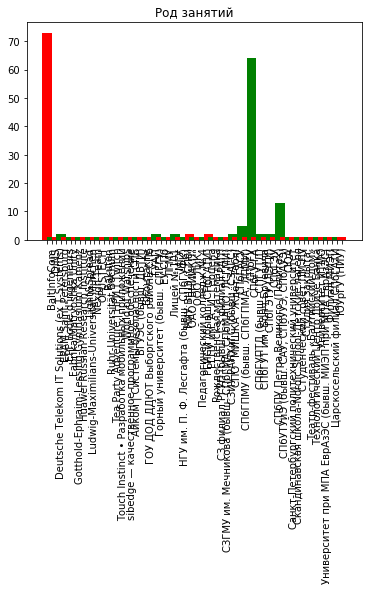

In [521]:
occupation = list(map(lambda u: u['occupation']['name'] if 'occupation' in u.keys() and u.get('occupation') else '',friends_data['response']['items'] ))
labels, counts = np.unique(occupation, return_counts=True)
print(labels, counts)
print(occupation)
# plt.plot(labels,counts)
plt.xticks(rotation = 'vertical')
plt.bar(labels, counts,
        width = 2, color = ['red', 'green']) 
plt.title("Род занятий")
plt.show()

Выводы:
Как можно видеть на чарте данные по карьере введены у слишком малого числа пользователей, чтобы выявлять какие-либо зависимости, основываясь на них. Поэтому было решено использовать род деятельности.

['' 'Dresden' 'Kuala Lumpur' 'Oslo' 'Seoul' 'Tokyo' 'Viljandi (Вильянди)'
 'Абакан' 'Весьегонск' 'Владивосток' 'Иваново' 'Казань' 'Кириши'
 'Кострома' 'Москва' 'Нижний Новгород' 'Пушкин' 'Санкт-Петербург' 'Сегежа'
 'Улан-Удэ' 'Челябинск'] [ 51   1   1   1   1   1   1   1   1   1   1   1   1   1   5   1   1 148
   1   1   1]
['', 'Санкт-Петербург', 'Санкт-Петербург', '', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Кириши', 'Санкт-Петербург', '', 'Санкт-Петербург', 'Санкт-Петербург', '', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Dresden', 'Сегежа', 'Санкт-Петербург', '', 'Санкт-Петербург', '', 'Санкт-Петербург', 'Санкт-Петербург', '', 'Москва', 'Tokyo', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт-Петербург', 'Санкт

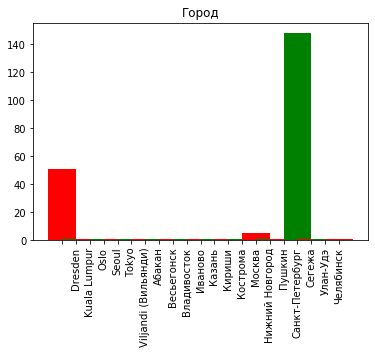

In [541]:
city = list(map(lambda u: u['city']['title'] if 'city' in u.keys() and u.get('city') else '',friends_data['response']['items'] ))
labels, counts = np.unique(city, return_counts=True)
print(labels, counts)
print(city)
# plt.plot(labels,counts)
plt.xticks(rotation = 'vertical')
plt.bar(labels, counts,
        width = 2, color = ['red', 'green']) 
plt.title("Город")
plt.show()

Вывод: 148-Санкт-Петербург, 5- Москва

In [181]:
def make_graph_friends_university(mutual_friends_list):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item)
                first = get_friend_data_by_id(mutual_friends_list[friend])
                second= get_friend_data_by_id(item)
                if first.get('university') == second.get('university'):
                    graph.add_edge(friend, item, weight=2)
    return graph

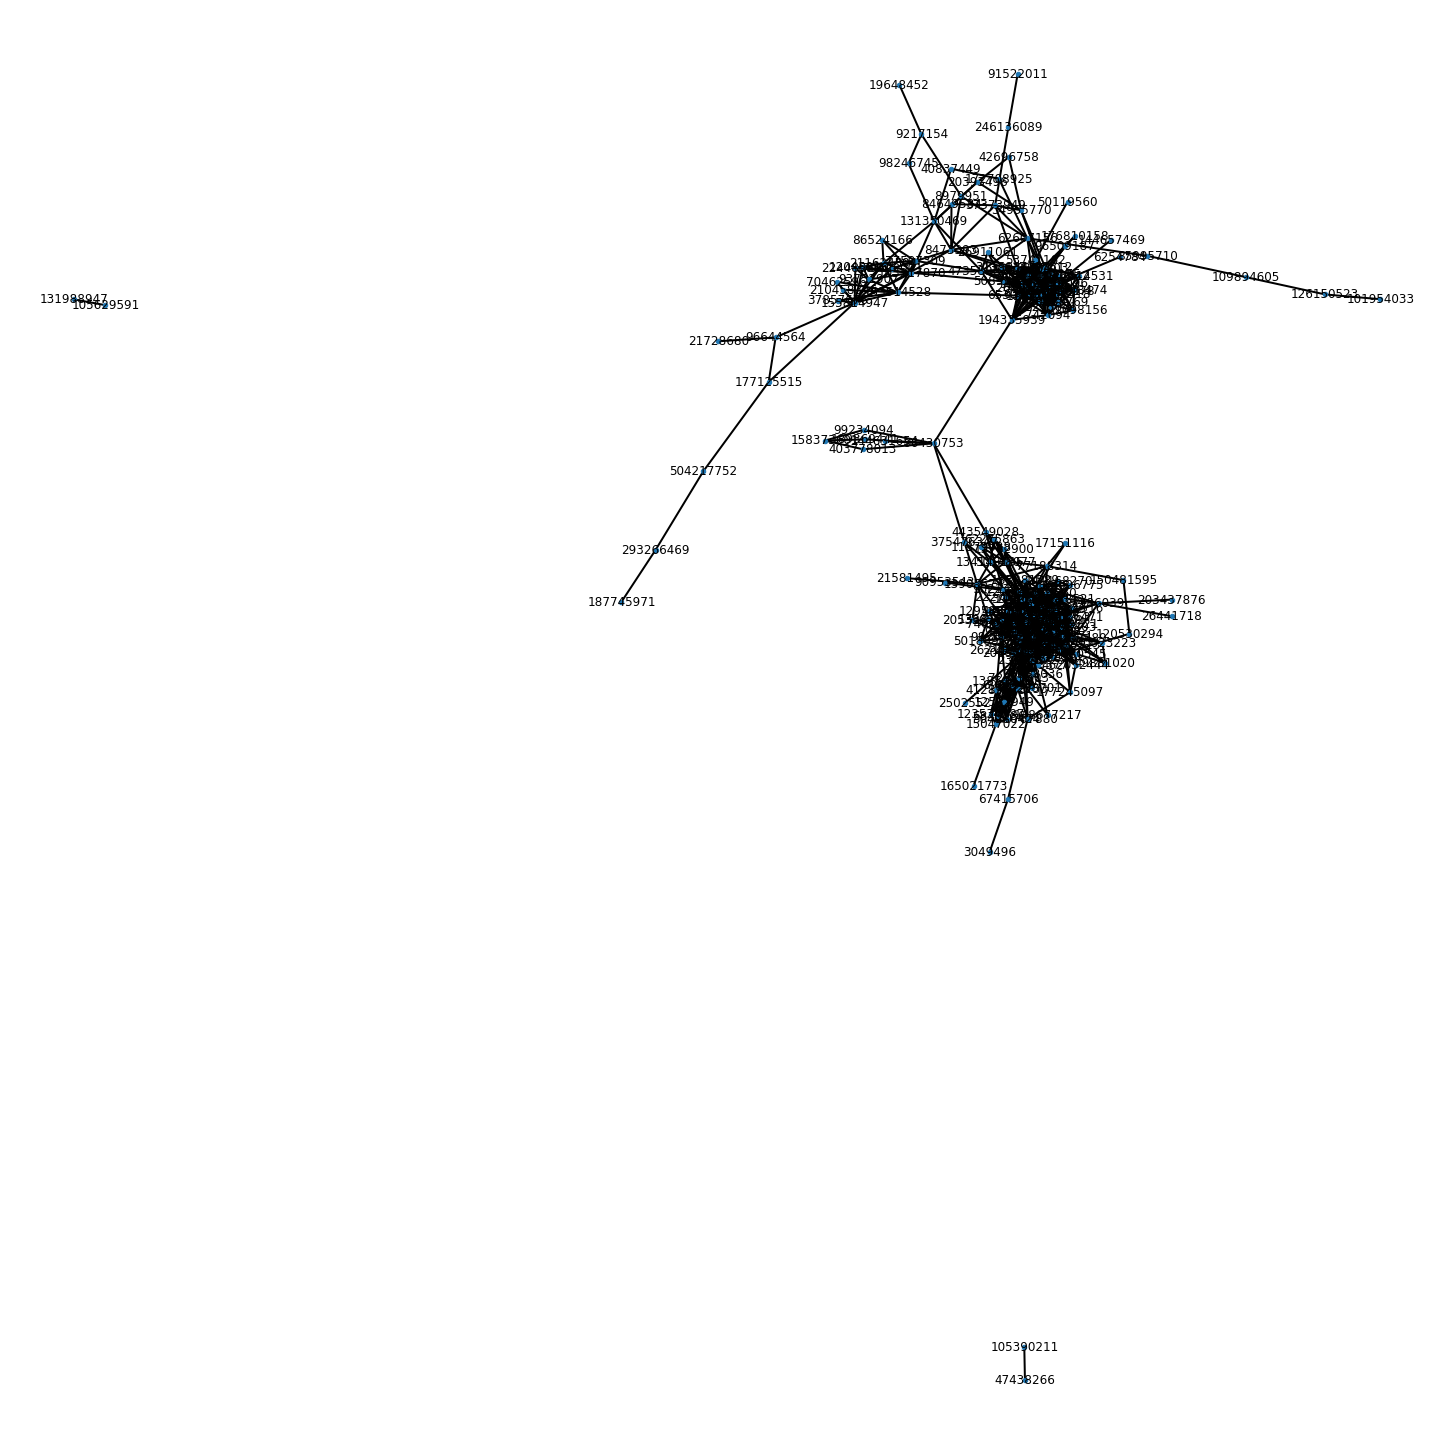

In [182]:
graph4 = make_graph_all_friends(mutual_friends_list)
plot_graph(graph4,4)

In [219]:
#Чисто пол, не учитывая друзей
def make_graph_sex():
    graph = nx.Graph()
    for friend1, friend2 in itertools.combinations(friends_ids, 2):
        graph.add_node(friend1)
        first = get_friend_data_by_id(friend1)
        second= get_friend_data_by_id(friend2)   
        if first.get('sex') == second.get('sex'):
            graph.add_edge(friend1, friend2)
    return graph

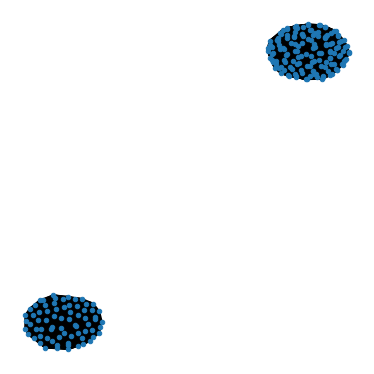

In [230]:
graph5 = make_graph_sex()
# plot_graph(graph5,5)
plt.figure(figsize=(5,5))
# pos= graphviz_layout(graph)
# pos=nx.spring_layout(graph, k=0.15)
nx.draw(graph5, node_color = None, node_size=20, width=2)
plt.savefig(f'VK_API/graph_data/graph{5}.png')

In [311]:
#Чисто университеты, не учитывая друзей
def make_graph_university():
    graph = nx.Graph()
    for friend1, friend2 in itertools.combinations(friends_ids, 2):
        graph.add_node(friend1)
        first = get_friend_data_by_id(friend1)
        second= get_friend_data_by_id(friend2)   
        if first.get('university')  == second.get('university'):
            graph.add_edge(friend1, friend2)
    return graph

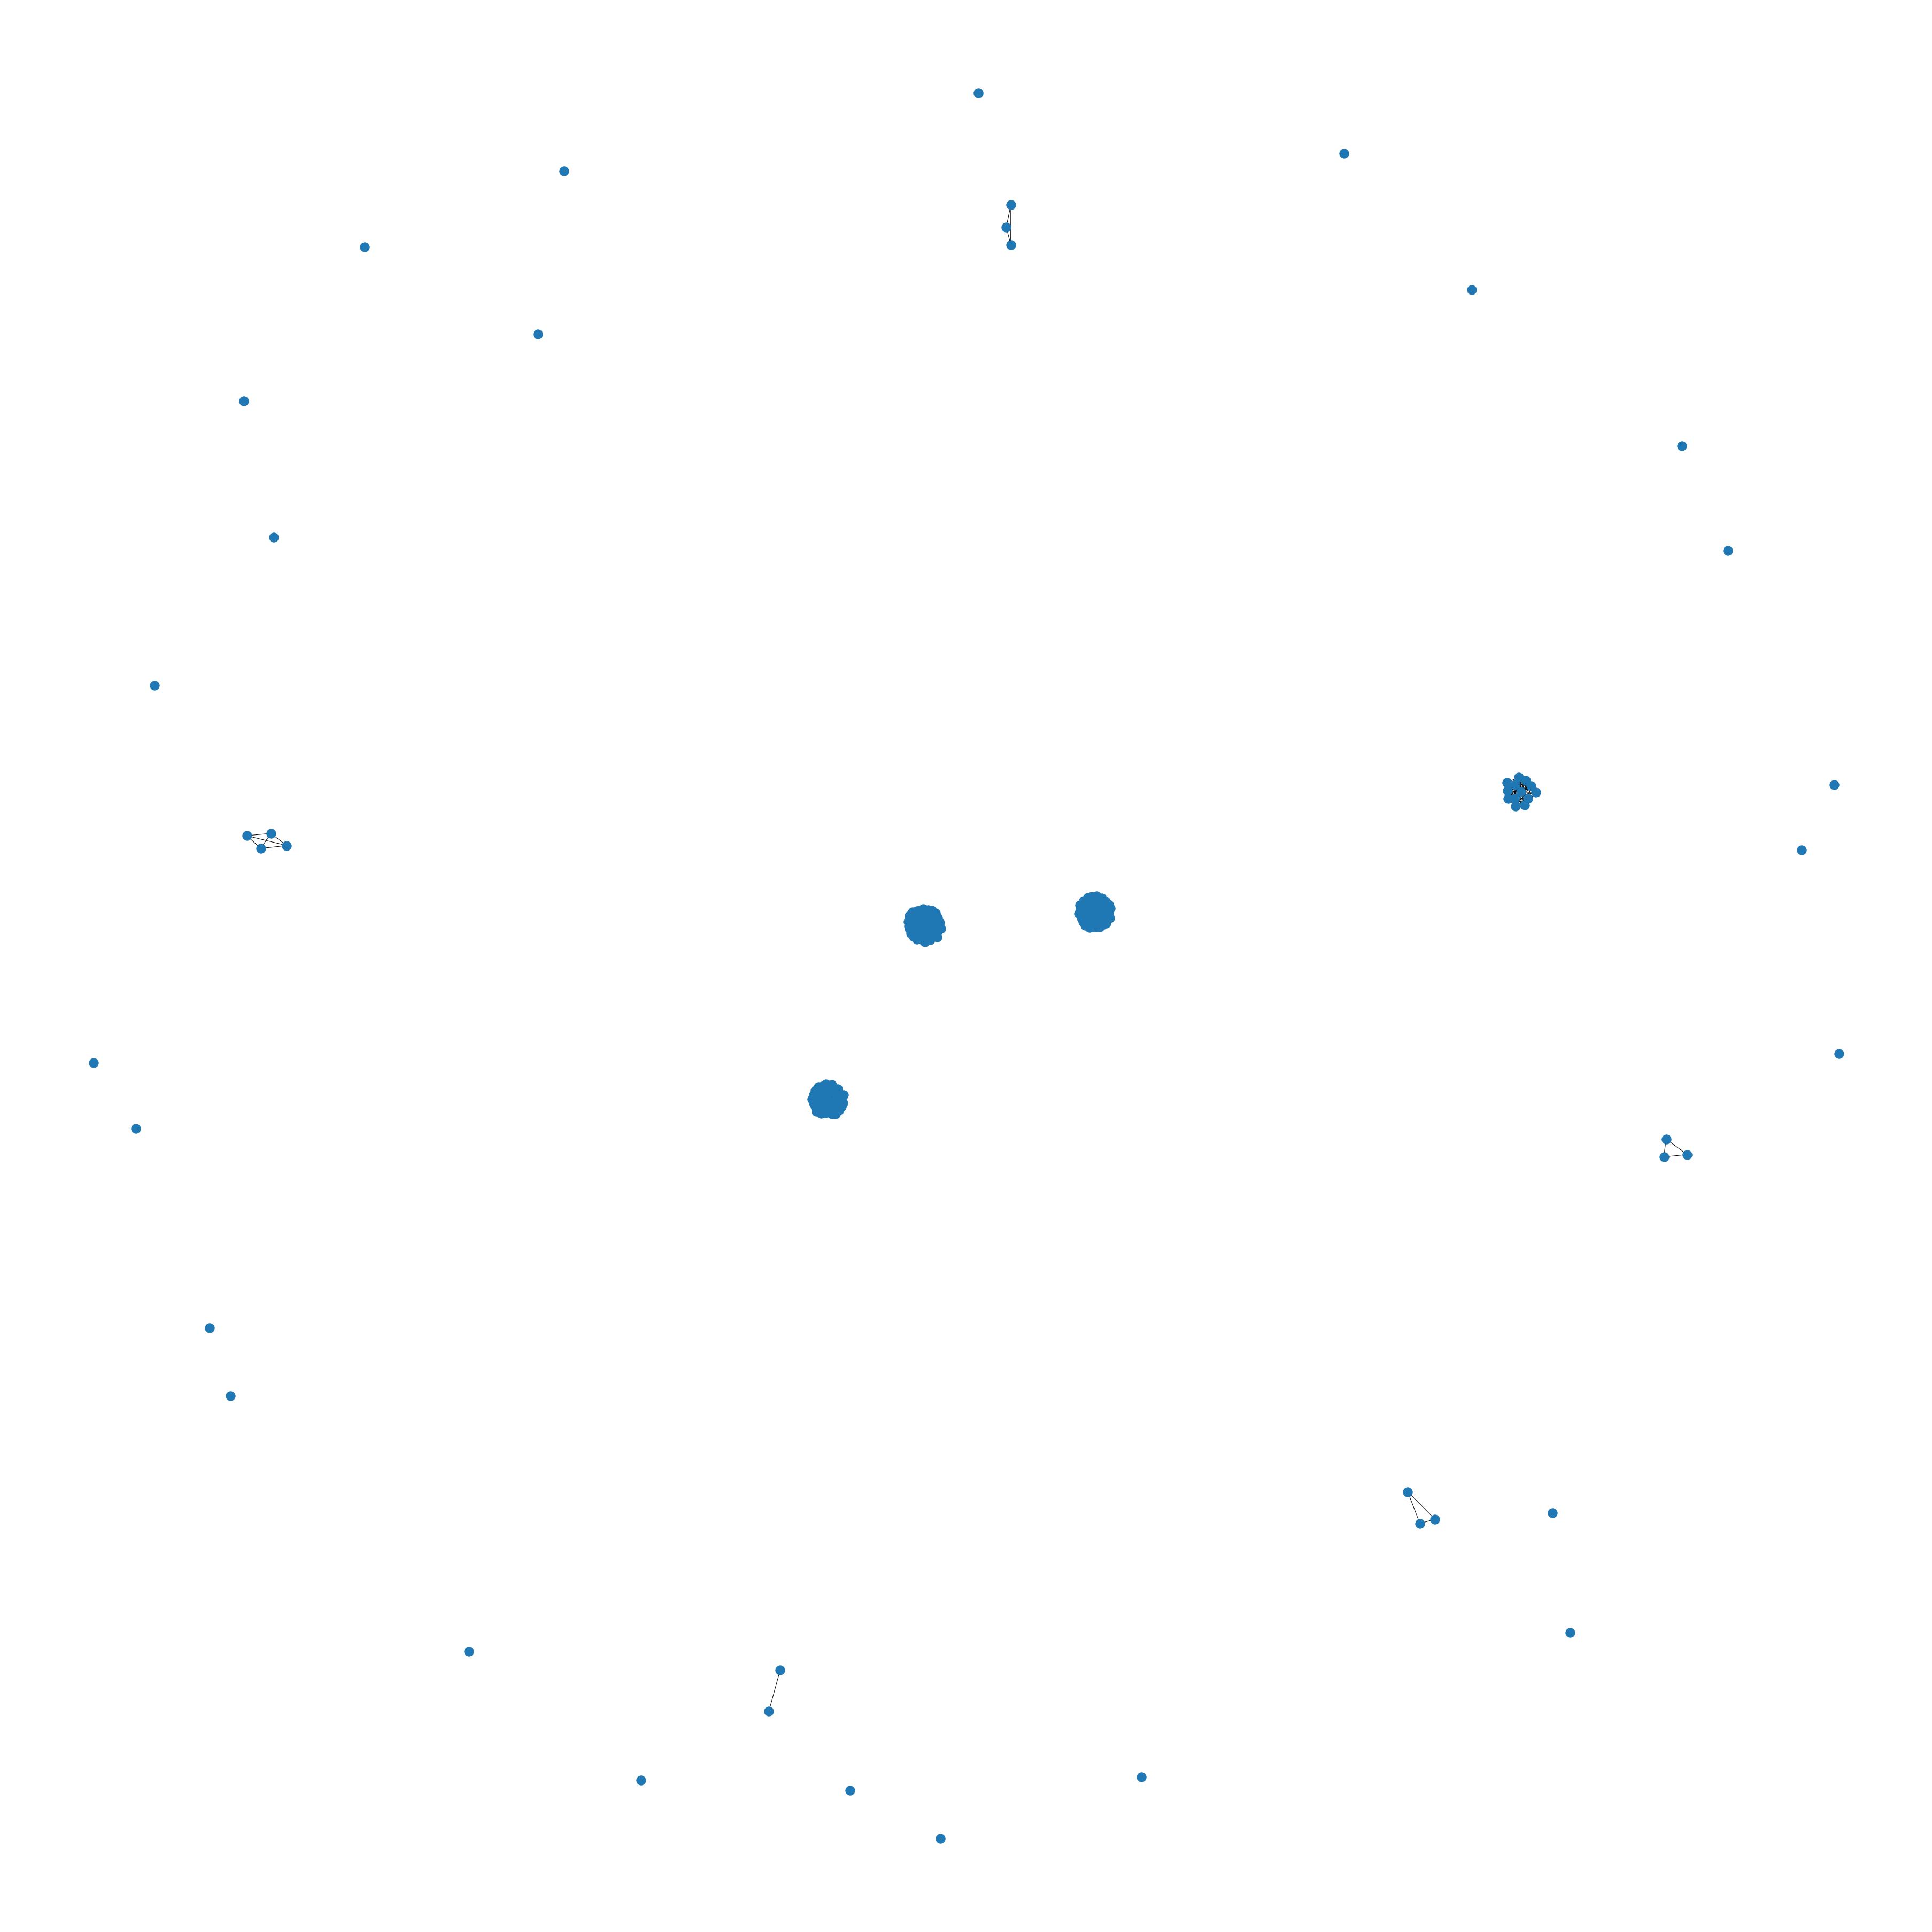

In [317]:
graph5 = make_graph_university()
plt.figure(figsize=(50,50))
# pos= graphviz_layout(graph)
# pos=nx.spring_layout(graph, k=0.15)
nx.draw(graph5, node_color = None)
plt.savefig(f'VK_API/graph_data/graph{index}.png')
index += 1

In [361]:
# Строим граф друзей ( учитывая общих друзей) с красными ребрами с одинаковыми университетами
def make_graph_all_friends_with_colors_university(mutual_friends_list):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item, color='b',weight=1)
                
                first = get_friend_data_by_id(friend)
                second= get_friend_data_by_id(item)   
                if first.get('university')  == second.get('university') and first.get('university')!= 0:
                    graph.add_edge(friend, item, color='r',weight=2)
#                     print(graph.edges())
    return graph

In [441]:
def check_school(first, second):
    #check on KeyError 
    if first.get('schools')and second.get('schools'):
        if len(first['schools'])> 0 and len(second['schools'])> 0 and first['schools'][0]['id']  == second['schools'][0]['id']: 
            return True
    return False

In [456]:
# Строим граф друзей ( учитывая общих друзей) с цветными ребрами с одинаковыми школами и университетами
def make_graph_all_friends_with_colors_university_school(mutual_friends_list):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item, color='b',weight=1)
                
                first = get_friend_data_by_id(friend)
                second= get_friend_data_by_id(item)   
                if first.get('university')  == second.get('university') and first.get('university')!= 0:
                    graph.add_edge(friend, item, color='r',weight=2)
                    if check_school(first,second): 
                        graph.add_edge(friend, item, color='k',weight=8)
                if check_school(first,second): 
                    graph.add_edge(friend, item, color='g',weight=2)
#                     print(graph.edges())
    return graph

In [568]:
def plot_graph_with_colors(graph, isLabel, index):
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(graph)

    edges = graph.edges()
    # print(edges)

    colors = [graph[u][v]['color'] for u,v in edges]
    weights = [graph[u][v]['weight'] for u,v in edges]
    if isLabel:
        edge_labels=dict([((u,v,),d['weight']) for u,v,d in graph.edges(data=True)]) 
        nx.draw_networkx_edge_labels(graph,pos,edge_labels=edge_labels)

    nx.draw(graph, pos, edges=edges, edge_color=colors, width=weights, node_size=10)
    plt.savefig(f'VK_API/graph_data/graph{index}.png')
    index += 1

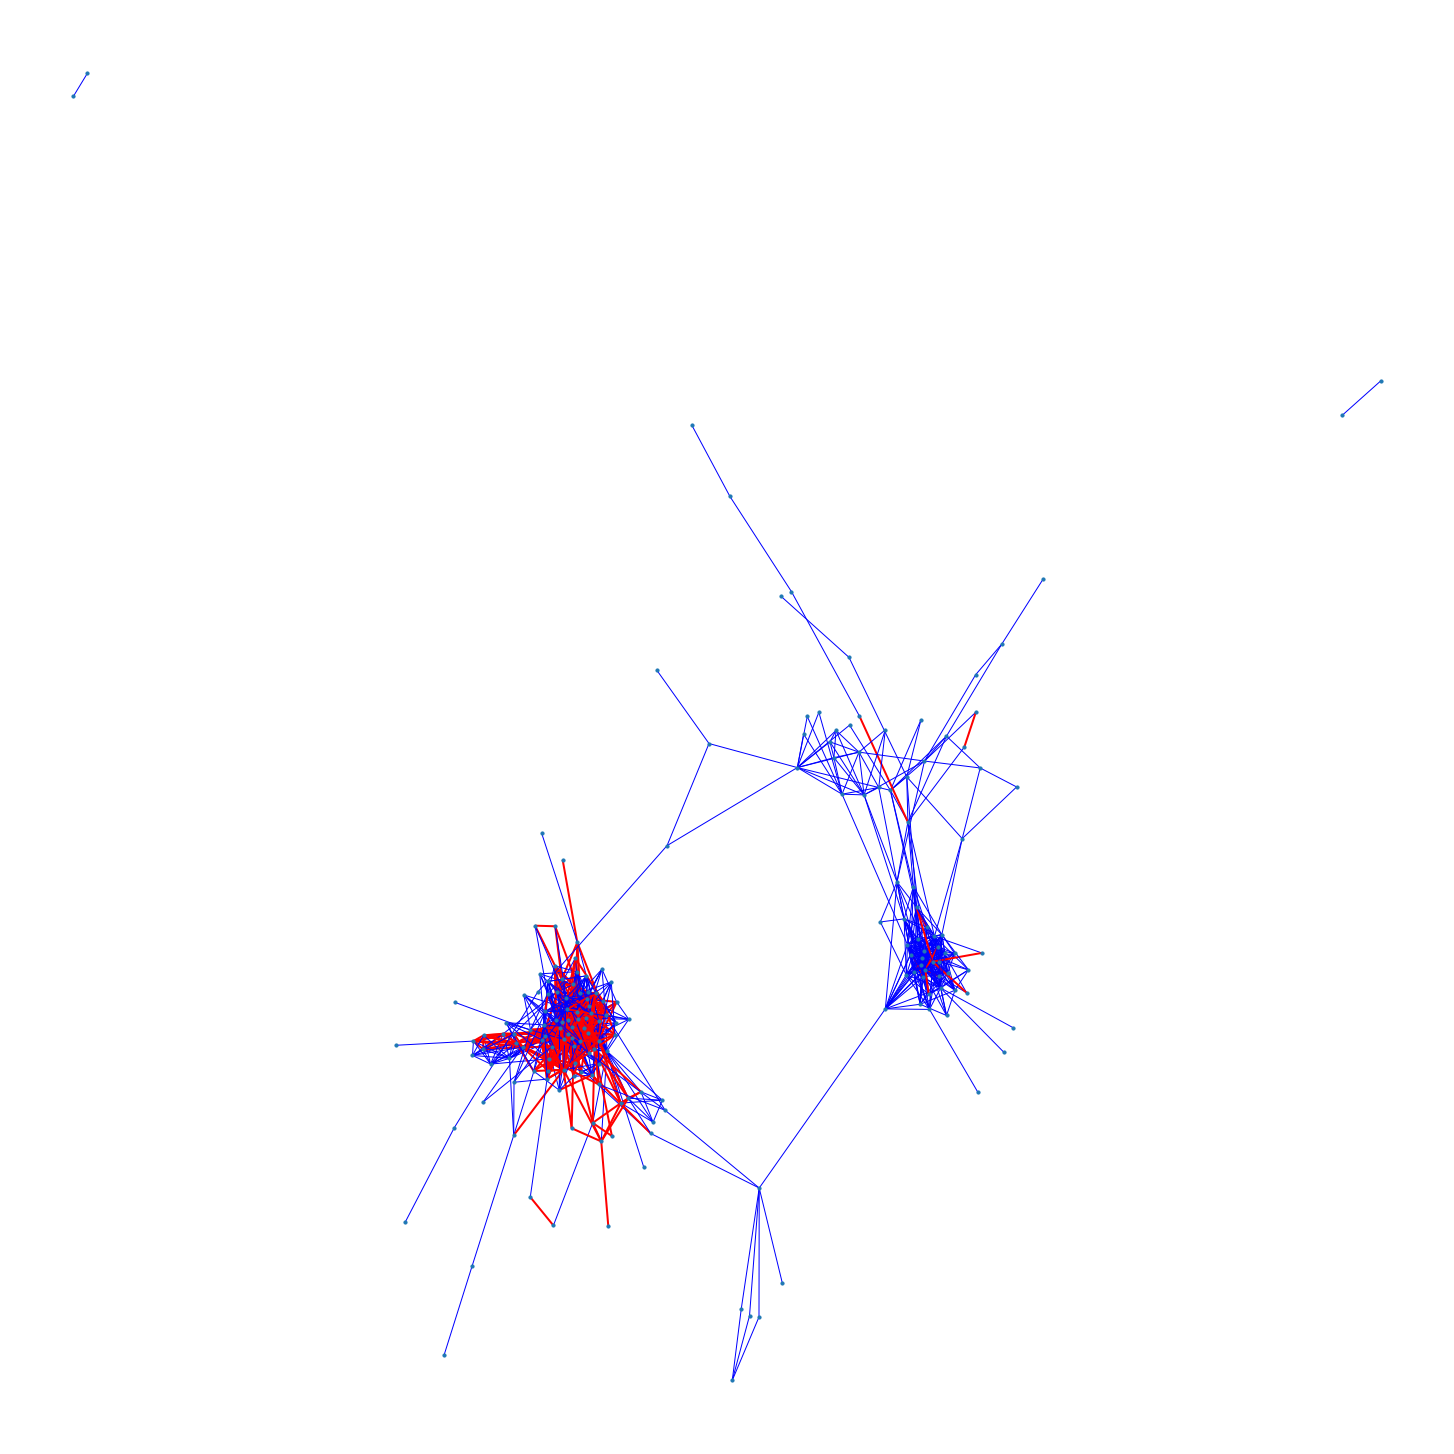

In [460]:
graph7 = make_graph_all_friends_with_colors(mutual_friends_list)
plot_graph_with_colors(graph7, False, index)

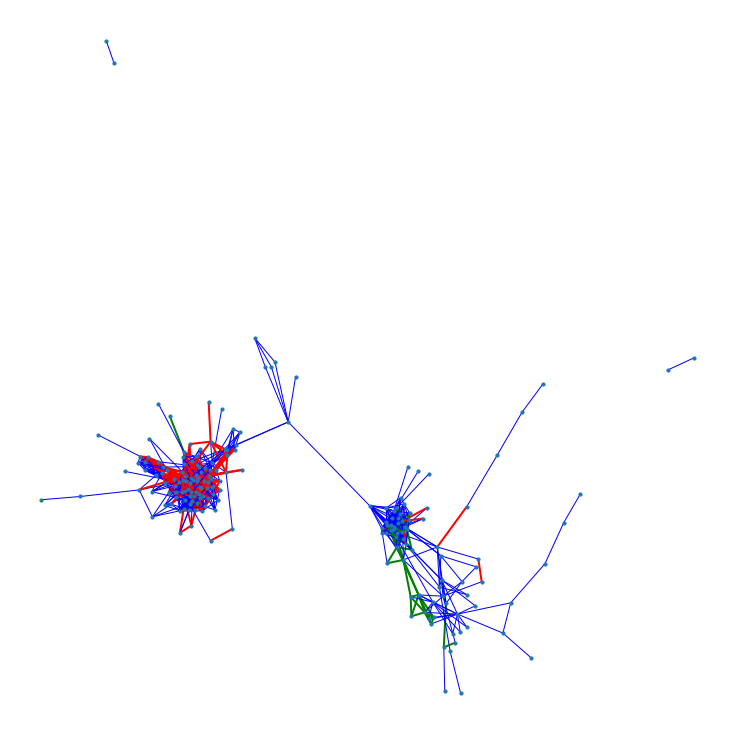

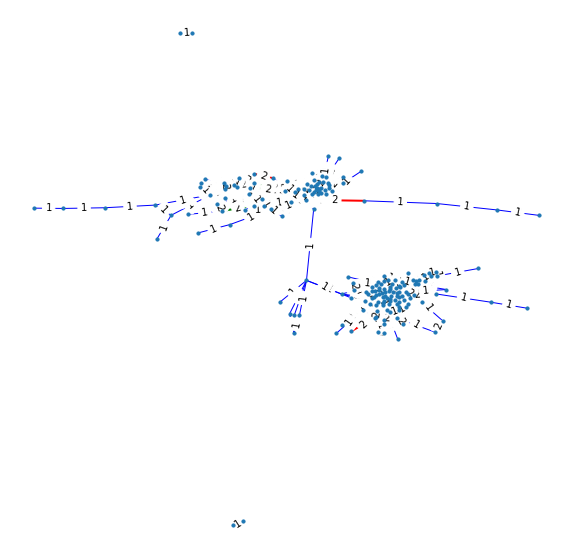

In [462]:
graph8 = make_graph_all_friends_with_colors_university_school(mutual_friends_list)
plot_graph_with_colors(graph8, False, index)
plot_graph_with_colors(graph8, True, index)

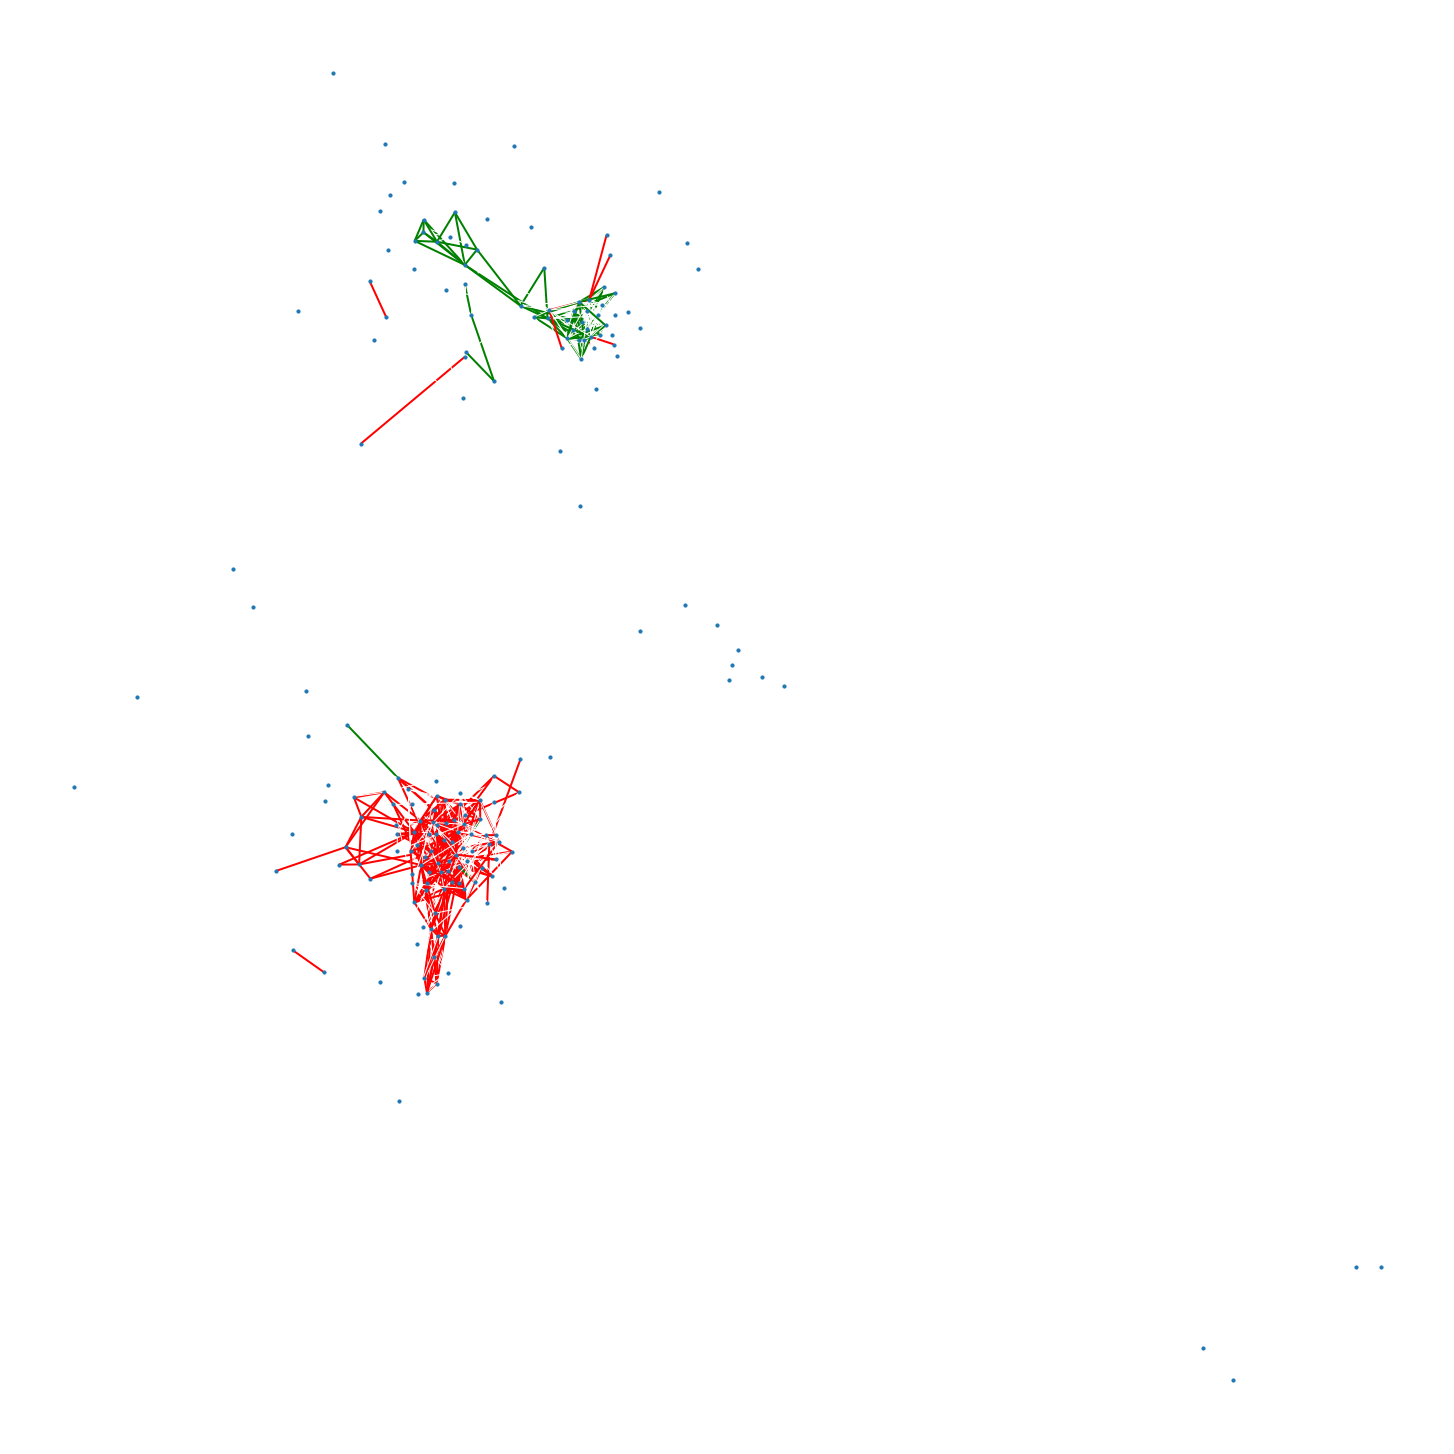

In [454]:
graph8 = make_graph_all_friends_with_colors_university_school(mutual_friends_list)
plot_graph_with_colors(graph8, False, index)

In [542]:
def check_occupation(first, second):
    #check on KeyError 
    try:
        if first.get('occupation')and second.get('occupation'):
            if first['occupation']['id']  == second['occupation']['id']: 
                return True
    except KeyError:
        return False
    return False

def check_sex(first, second):
    #check on KeyError 
    if first.get('sex')and second.get('sex'):
        if first['sex']  == second['sex']: 
            return True
    return False

def check_city(first, second):
    #check on KeyError 
    if first.get('city')and second.get('city'):
        if first['city']['id']  == second['city']['id']: 
            return True
    return False

In [536]:
# Строим граф друзей ( учитывая общих друзей) с цветными ребрами с одинаковым родом деятельности и полом
def make_graph_all_friends_with_colors_university_school(mutual_friends_list):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item, color='k',weight=1)
                
                first = get_friend_data_by_id(friend)
                second= get_friend_data_by_id(item)   
                if check_occupation(first, second):
                    graph.add_edge(friend, item, color='r',weight=2)
                    if check_sex(first,second): 
                        graph.add_edge(friend, item, color='g',weight=3)
                if check_sex(first,second): 
                    graph.add_edge(friend, item, color='g',weight=2)
#                     print(graph.edges())
    return graph

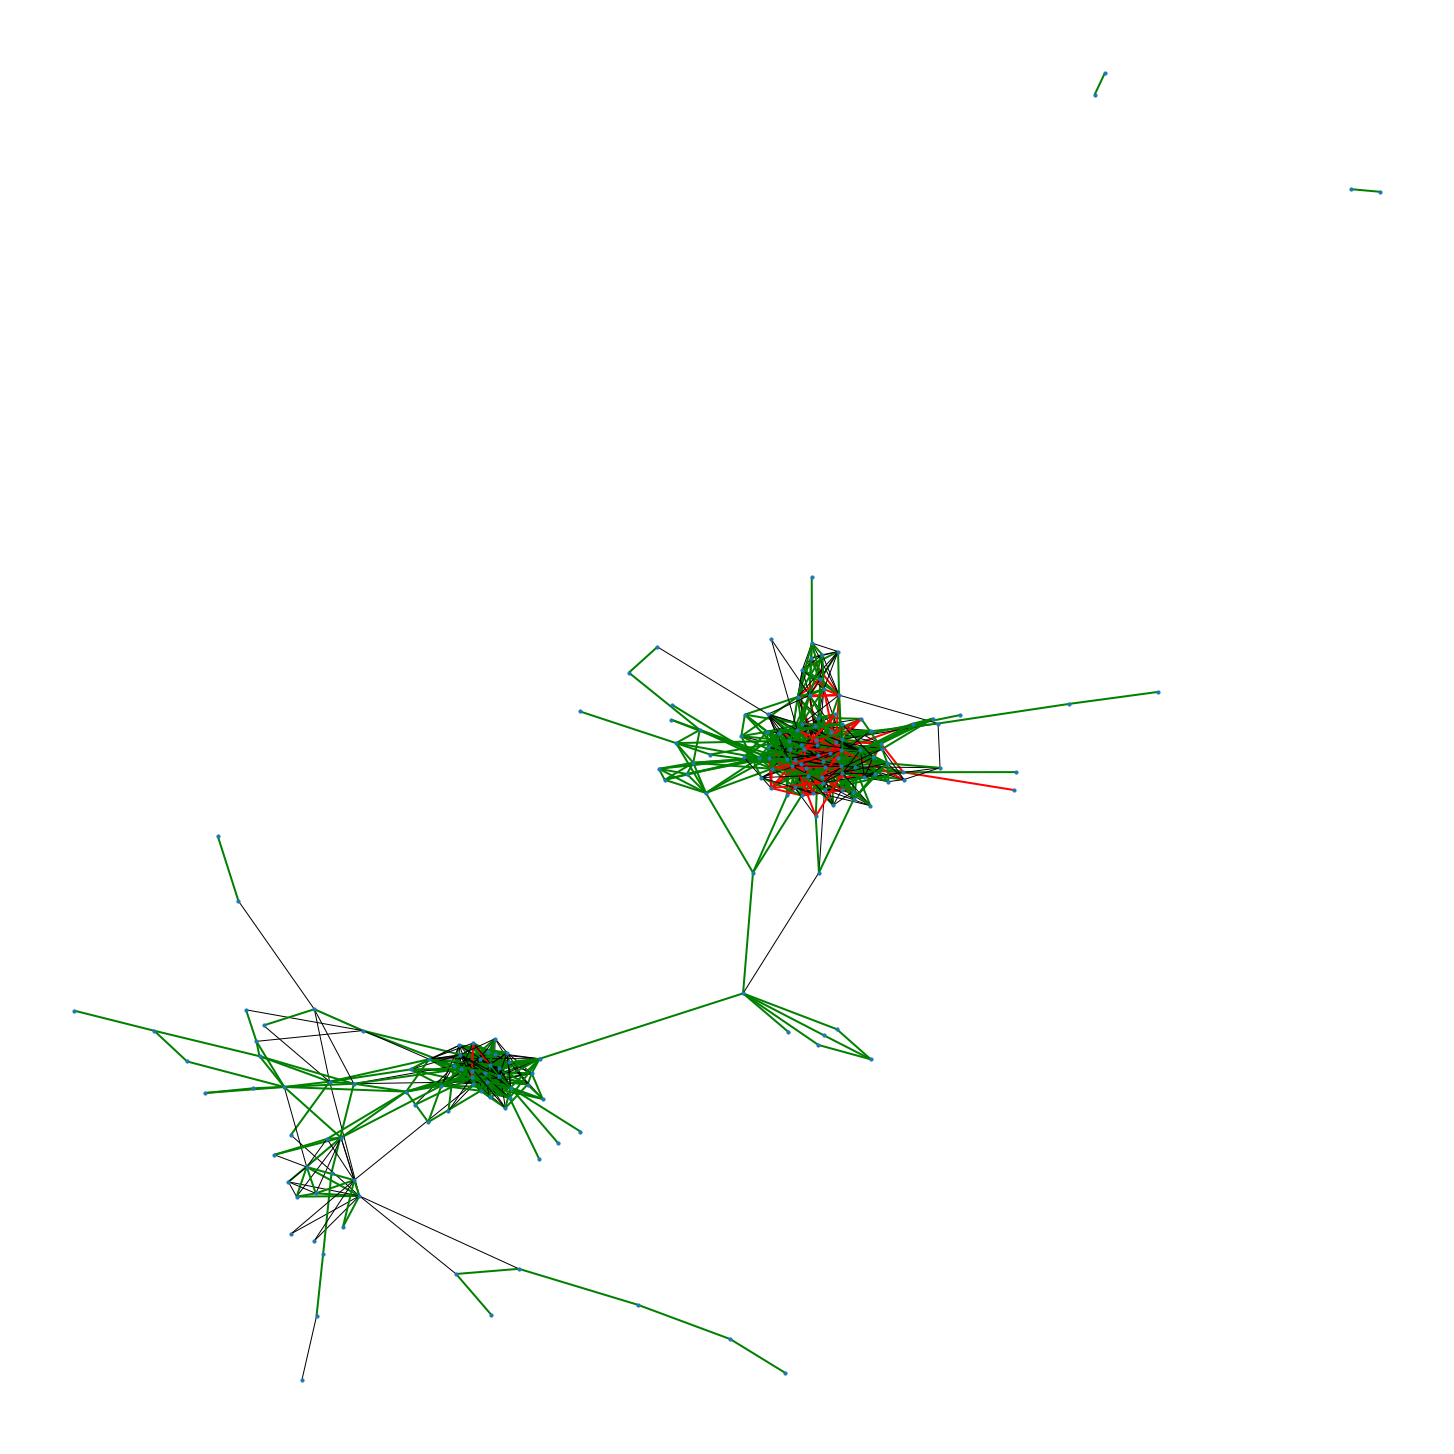

In [537]:
graph8 = make_graph_all_friends_with_colors_university_school(mutual_friends_list)
plot_graph_with_colors(graph8, False, index)

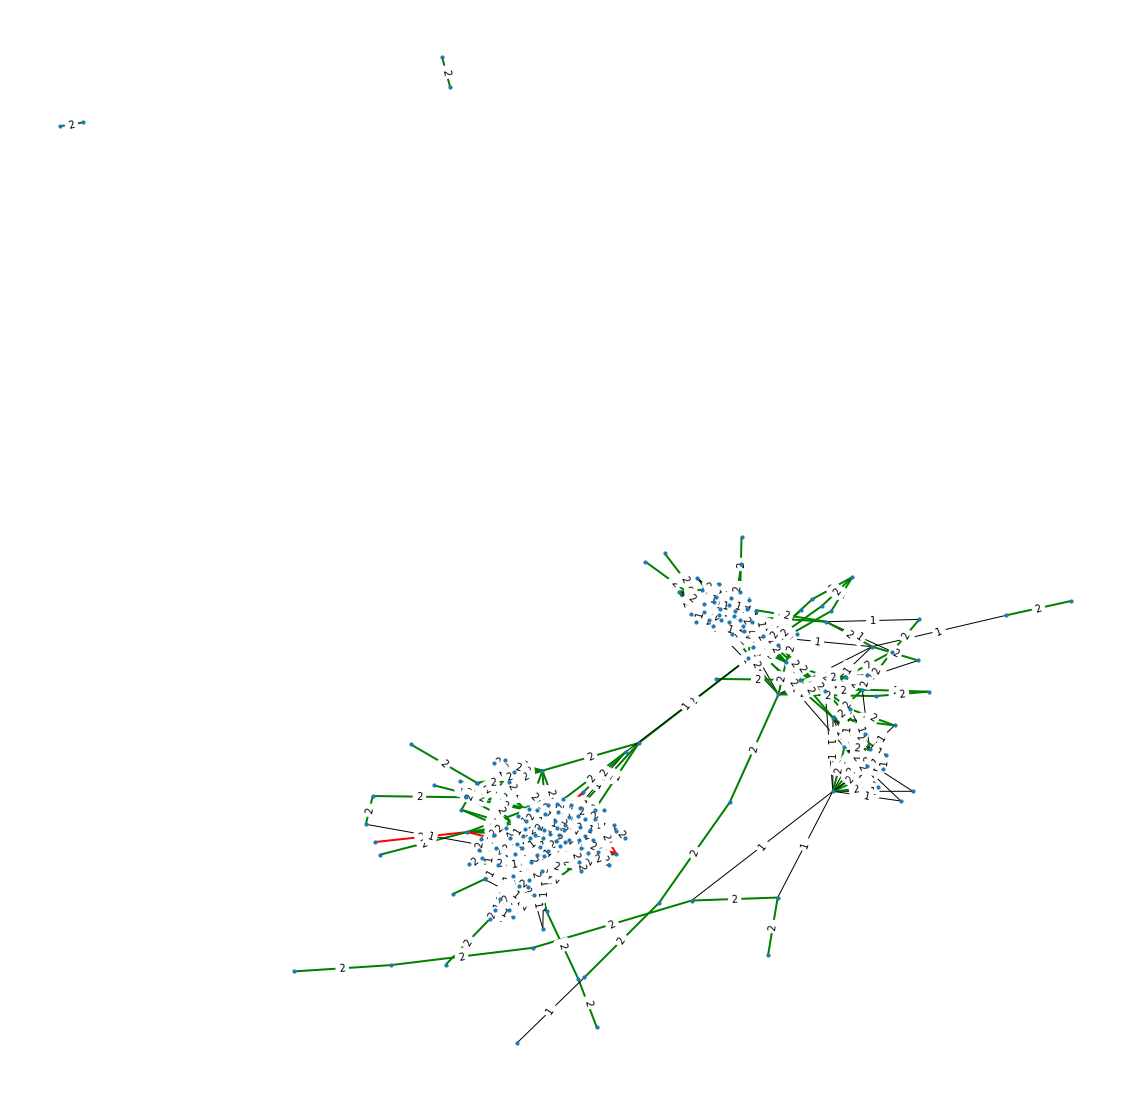

In [538]:
plot_graph_with_colors(graph8, True, index)

In [552]:
# Строим граф друзей ( учитывая общих друзей) с цветными ребрами с одинаковым городом 
def make_graph_all_friends_with_colors_city(mutual_friends_list):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                graph.add_edge(friend, item, color='w',weight=1)
                
                first = get_friend_data_by_id(friend)
                second= get_friend_data_by_id(item)   
                if check_city(first, second):
                    graph.add_edge(friend, item, color='k',weight=2)
    return graph

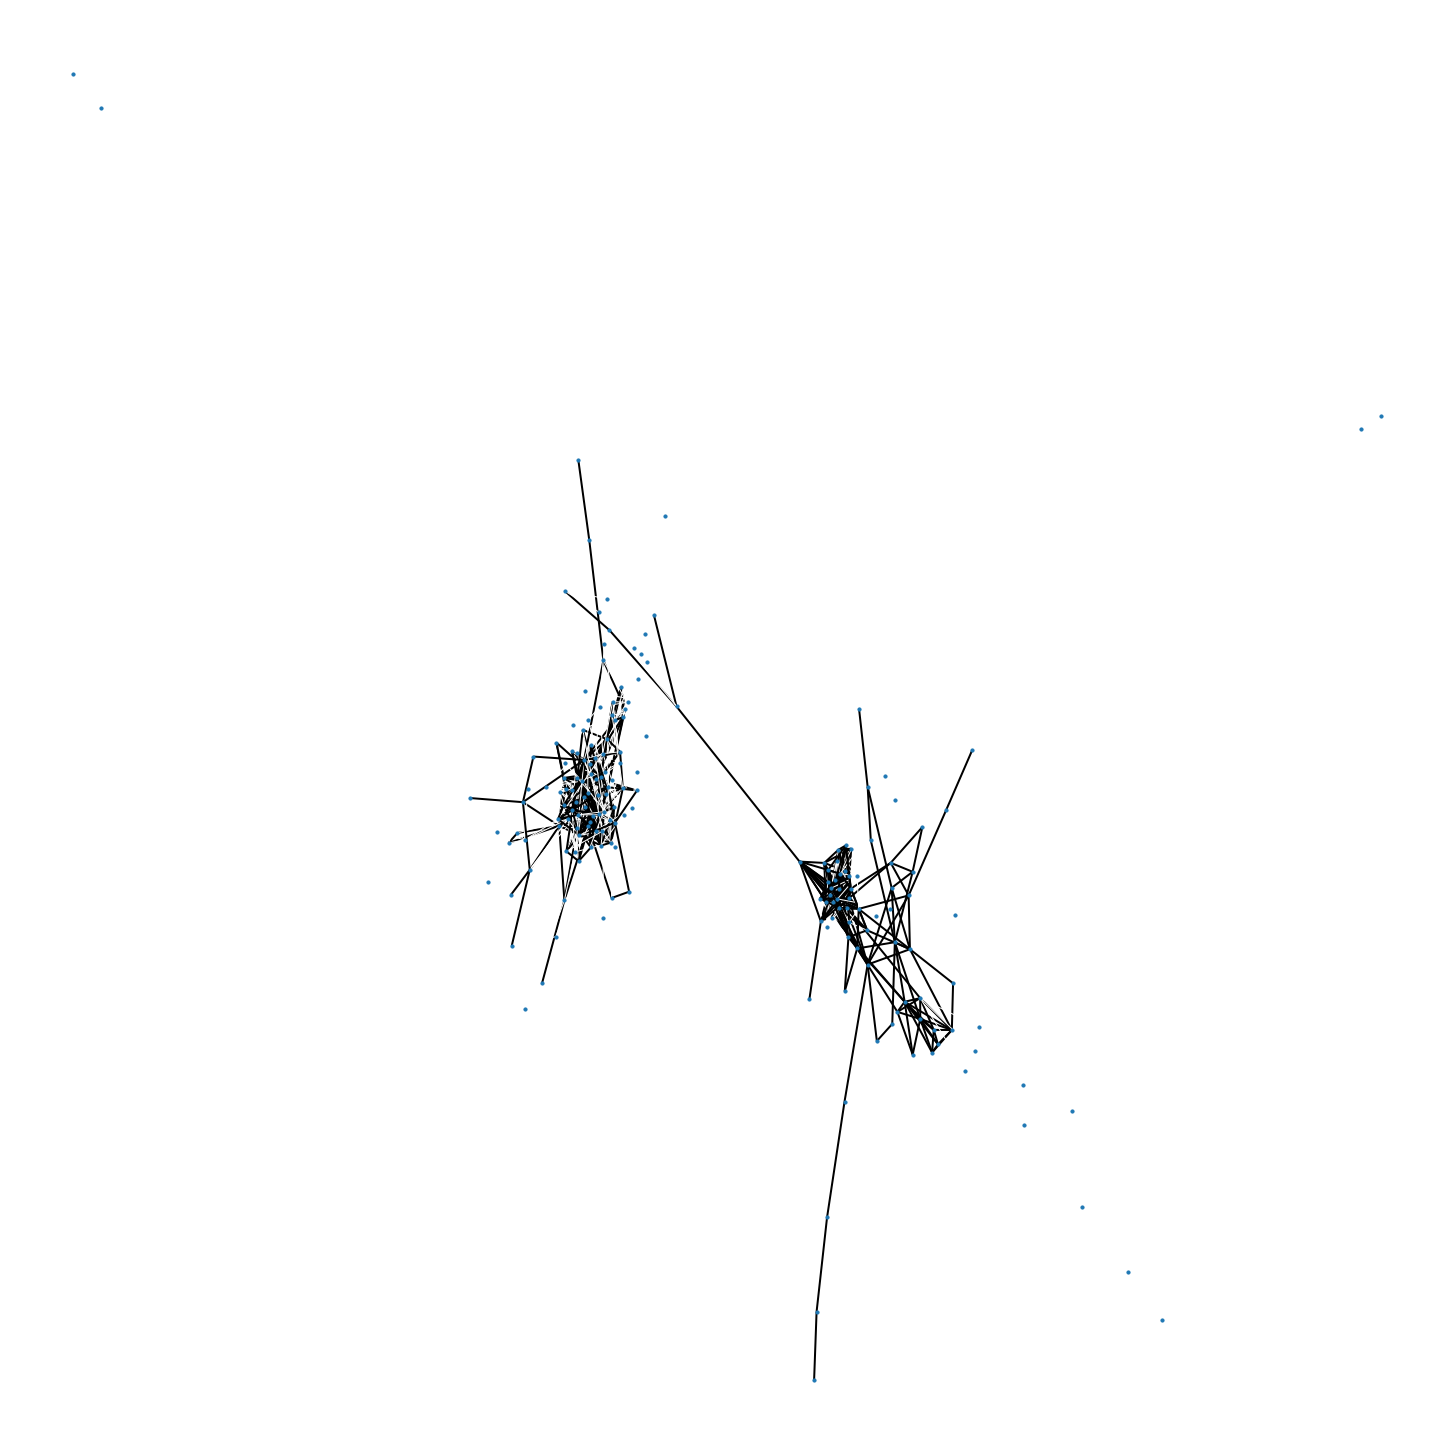

In [553]:
graph9 = make_graph_all_friends_with_colors_city(mutual_friends_list)
plot_graph_with_colors(graph9, False, index)

In [567]:
# Строим граф друзей ( учитывая общих друзей) с цветными ребрами (связность 4)
def make_graph_all_friends_with_colors_connection(mutual_friends_list):
    graph = nx.Graph()
    mutual = mutual_friends_list.items()
    
    for friend in mutual_friends_list.keys():
        if mutual_friends_list[friend]:
            graph.add_node(friend, size=len(mutual_friends_list[friend]))
            for item in mutual_friends_list[friend]:
                weight=0
                first = get_friend_data_by_id(friend)
                second= get_friend_data_by_id(item)   
                graph.add_edge(friend, item, color='w',weight=1)
                if check_city(first, second):
                    weight += 1
                if check_school(first, second):
                    weight += 1 
                if check_occupation(first, second): 
                    weight += 1
                if check_sex(first, second): 
                    weight += 1 
                if weight ==1:
                    graph.add_edge(friend, item, color='b',weight=2)
                if weight ==2:
                    graph.add_edge(friend, item, color='k',weight=3)
                if weight ==3:
                    graph.add_edge(friend, item, color='g',weight=4)
                if weight ==4:
                    graph.add_edge(friend, item, color='r',weight=5)

    return graph

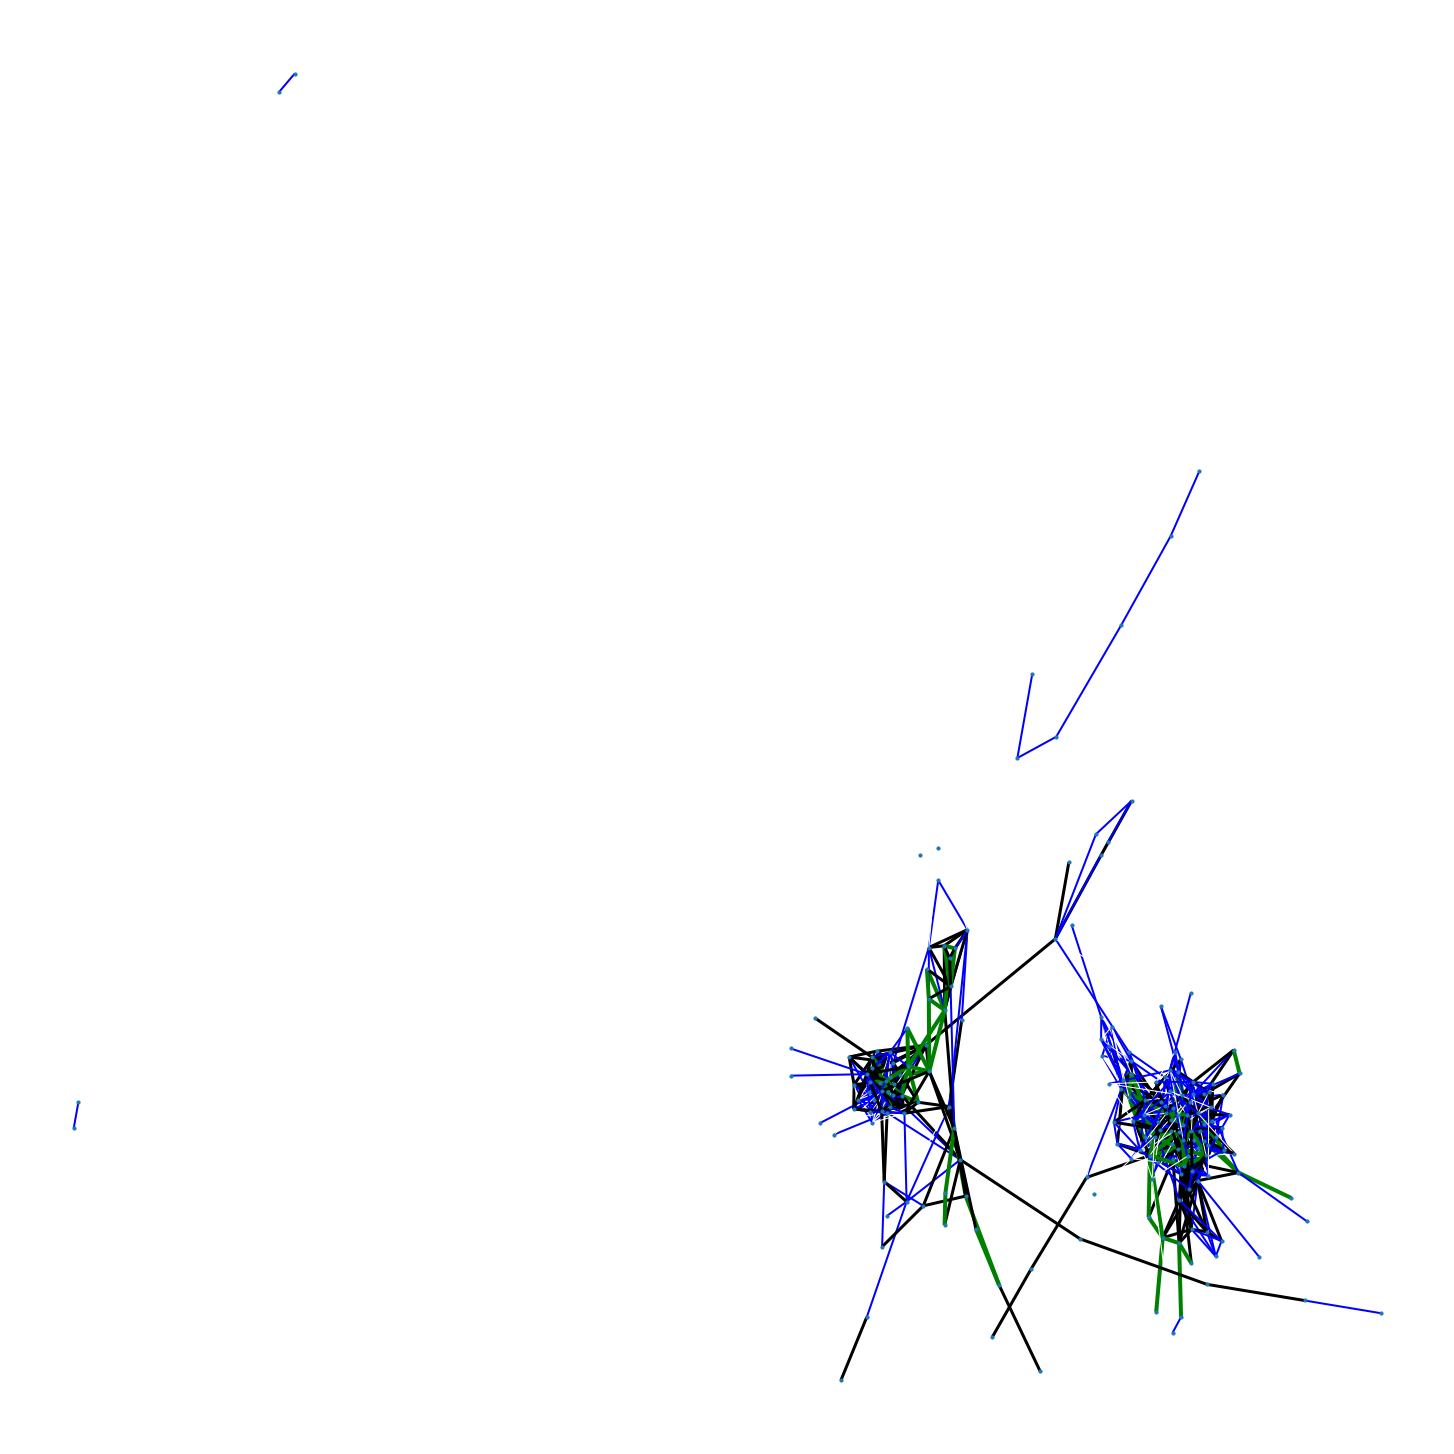

In [569]:
graph10 = make_graph_all_friends_with_colors_connection(mutual_friends_list)
plot_graph_with_colors(graph10, False, index)